Если вы дошли до этого момента, то уже сделали половину пути. Каждую ячейку можно выполнить, нажав Shift+Enter или кнопку Run на панели сверху. Всё, что она выведет будет показано ниже этой ячейки. Также каждая ячейка выводит результат последней строки.

Ваша задача написать код, в местах помеченных "### ваш код здесь" так, чтобы всё работало правильно

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install sklearn

In [22]:
# Подробнее со следующими библиотеками вы познакомитесь на следующих занятиях. 
# Для решения задания потребуется лишь знания чистого python.
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

### K-means

Алгоритм k-means применяется для задачи кластеризации. Напомню его основные шаги. Пусть у нас имеется N точек на плоскости ${(x_1,y_1),...,(x_N,y_N)}$
Допустим мы хотим разбить их на k=3 кластера.
1. Выбираем k=3 случайные точки из этого множества. Говорим, что они являются теперь центрами наших кластеров.
2. Для каждой из оставшихся точек смотрим, к какому из центров она ближе и определяем её в этот кластер.
3. У нас получилось разбить точки на 3 кластера. Естественно это не оптимальное разбиение. Найдём новые центры кластеров. Например, если точки ${(x_{i_1}, y_{i_1}),...,(x_{i_n}, y_{i_n})}$ попали в один кластер, то их новый центр будет имеет координаты:
$$x_M=\frac{x_{i_1}+...+x_{i_n}}{n}$$
$$y_M=\frac{y_{i_1}+...+y_{i_n}}{n}$$
4. Переходим к шагу 2 и продолжаем до тех пор, пока кластеры не перестанут меняться.

Сгенерируем искусственно 3 кластера случайных точек.

In [102]:
points = []

# Параметры кластеров
num_clusters = 3
cluster_size = 40

# Центры кластеров
means_x = [1., 1.2, 0.8]
means_y = [0.5, 0.6, 0.5]

# Разброс
std = 0.1

for k in range(num_clusters):
    for i in range(cluster_size):
        x_i = np.random.normal(loc=means_x[k], scale=std)
        y_i = np.random.normal(loc=means_y[k], scale=std)
        points.append((x_i, y_i))

Каждый цвет - отдельный кластер. Но у нас не будет этих цветов, а только координаты точек.

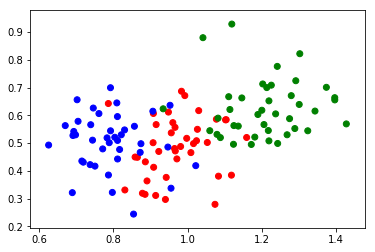

In [103]:
points_x = list(map(lambda x: x[0], points))
points_y = list(map(lambda x: x[1], points))
colors = ['r'] * cluster_size + ['g'] * cluster_size + ['b'] * cluster_size
plt.scatter(x=points_x, y=points_y, c=colors)

In [104]:
# Код алгоритма
def k_means(points, num_clusters):
    """
    @param points: список из пар координат точек
    @param num_clusters: число кластеров, на которое необходимо поделить

    @return: номера кластеров и их центры
    """
    num_points = len(points)
    # Выбираем начальные центры кластеров (просто первые num_clusters точек)
    centers = points[:num_clusters]
    # В качестве результата будет массив с номерами кластеров для каждой точки
    result = []
    # Предыдущая копия массива result, чтобы сравнивать, поменялось что-то или нет
    prev_result = None
    
    # Выведем на экран стартовую ситуацию
    print("Входные данные")
    points_x = list(map(lambda x: x[0], points))
    points_y = list(map(lambda x: x[1], points))
    plt.scatter(x=points_x, y=points_y)
    plt.show()
    
    it_num = 1
    # Работаем до тех пор, пока кластеры не перестанут меняться
    while result != prev_result:
        prev_result = list(result)
        
        result = []
        
        for point in range (len(points)):
            
            dist = None
            dist_num = -1
            
            for i in range (num_clusters):
                
                dist_x = (points[point][0] - centers[i][0]) ** 2
                dist_y = (points[point][1] - centers[i][1]) ** 2
                
                new_dist = math.sqrt(dist_x + dist_y)
                
                if dist == None or new_dist < dist:
                    dist = new_dist   
                    dist_num = i
                                        
            result.append(dist_num)
        
            
                
        centers = []
        
        # Меняем центры кластеров
        
        for i in range (num_clusters):
            n = 0
            sum_x = 0
            sum_y = 0
            
            for coord_index in range (len(result)):
                if result[coord_index] == i:
                    sum_x += points[coord_index][0]
                    sum_y += points[coord_index][1]
                    n += 1
            centers.append([sum_x/n, sum_y/n])
                
            

        
        # Выведем то, что у нас получилось
        print("Итерация №{}".format(it_num))
        it_num += 1
        points_x = list(map(lambda x: x[0], points))
        points_y = list(map(lambda x: x[1], points))    
        plt.scatter(x=points_x, y=points_y, c=result)
        plt.show()
    return result, centers    

Входные данные


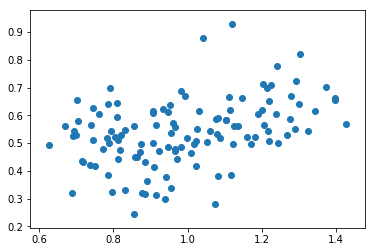

Итерация №1


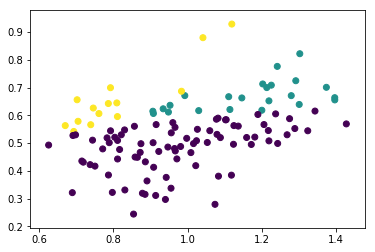

Итерация №2


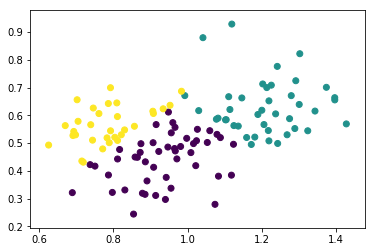

Итерация №3


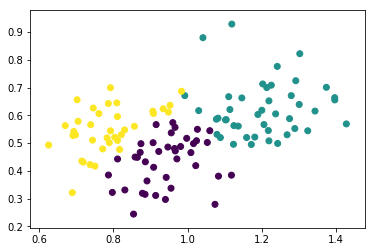

Итерация №4


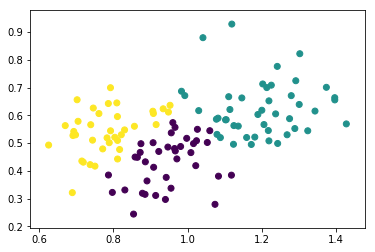

Итерация №5


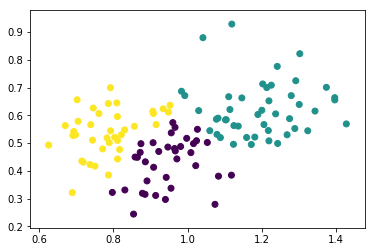

Итерация №6


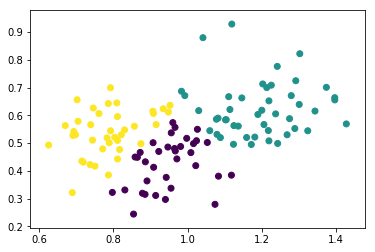

Итерация №7


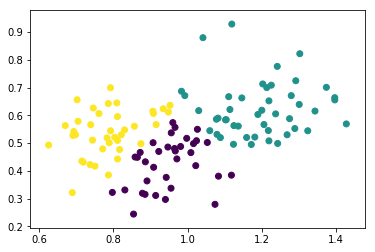

([0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  1,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  2,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2],
 [[0.9500643189681083, 0.4268905837254144],
  [1.1935237413224267, 0.6218422301909923],
  [0.787579970693982, 0.5380578165033054]])

In [105]:
k_means (points, 3)

Входные данные


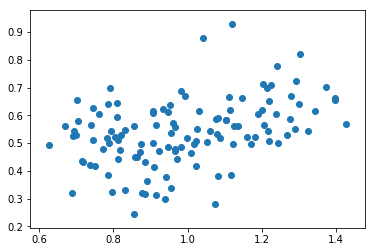

Итерация №1


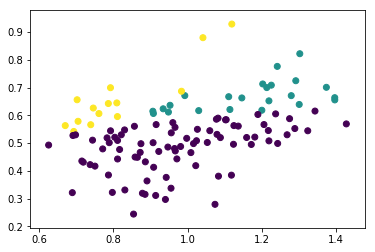

Итерация №2


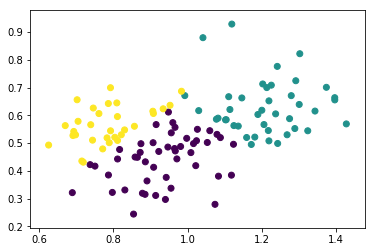

Итерация №3


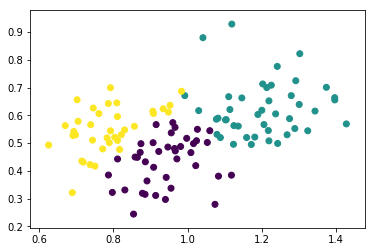

Итерация №4


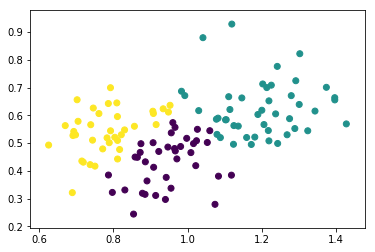

Итерация №5


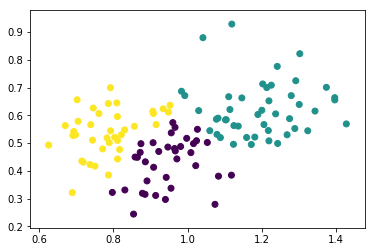

Итерация №6


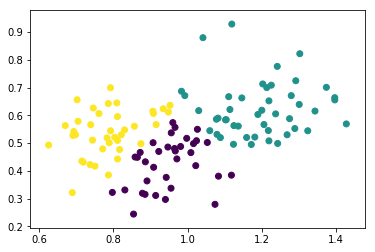

Итерация №7


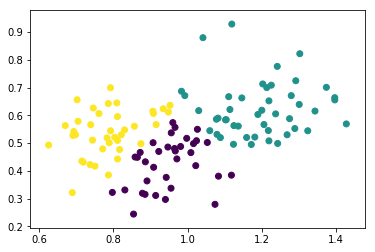

Истинные центры кластеров:
(1.0, 0.5)
(1.2, 0.6)
(0.8, 0.5)
Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:
(1.0, 0.4)
(1.2, 0.6)
(0.8, 0.5)


In [106]:
res, centers = k_means(points, 3)
print("Истинные центры кластеров:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(means_x[i], means_y[i]))
print("Полученные центры кластеров. Порядок может поменяться, а значения могут немного отличаться:")
for i in range(num_clusters):
    print("({0:.1f}, {1:.1f})".format(centers[i][0], centers[i][1]))

### MSE

Напомним формулу для MSE между двумя массивами длины n. Необходимо проверить, насколько сильно они отличаются:
$$MSE(x, y) = \frac{1}{n}((x_1-y_1)^2+...+(x_n-y_n)^2)$$

In [113]:
def mse(x, y):
    """
    @param x, y: массивы одинаковой длины
    @return: число, результат их MSE
    """
    assert len(x) == len(y)
    n = len(x)
    dsum = 0
    for i in range (n):
        dsum += (x[i] - y[i]) ** 2
    return (1/n)*dsum

Проверим на простом примере. Должно получиться 5.0:

In [114]:
x = [1, 3, 2, 4, 5, 6]
y = [2, 4, 3, 5, 6, 1]
mse(x, y)

5.0

Теперь проверим на более сложном примере.  Далее в коде ничего изменять не надо, просто посмотрите, как отличаются ошибки алгоритма, который всегда выдаёт 0, а также более продвинутого алгоритма.

В качестве данных у нас картинки с рукописными цифрами из sklearn. Они небольшого размера, но, в принципе, все числа различимы. Это задача классификации с 10 классами (цифры от 0 до 9).

7


<Figure size 432x288 with 0 Axes>

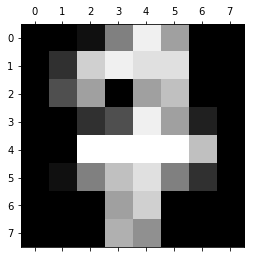

In [115]:
digits = load_digits()
plt.gray()
print(digits.target[17])
plt.matshow(digits.images[17])
plt.show()

Каждая черно-белая картинка это двухмерный массив 8x8, который мы будем использовать в качестве признаков. Первые 1500 цифр возьмём в качестве обучающей выборки, а оставшиеся в качестве тестовой.

In [116]:
X = digits.images.reshape(len(digits.images), -1)
y = digits.target

# Разбиваем на обучающую и тестовую выборки
X_train, y_train = X[:1500], y[:1500]
X_test, y_test = X[1500:], y[1500:]

# Создаём модель
clf = RandomForestClassifier()
# Обучаем модель
clf = clf.fit(X_train, y_train)

In [117]:
# Попробуем посмотреть, правильно ли обучилась модель
print("Истинные значения первых 10 элементов:")
print(y_test[:10])
y_pred = clf.predict(X_test[:10])
print("Предсказанные значения первых 10 элементов:")
print(y_pred)

Истинные значения первых 10 элементов:
[1 7 4 6 3 1 3 9 1 7]
Предсказанные значения первых 10 элементов:
[1 7 4 6 3 1 3 9 1 7]


Вполне неплохо. Выведем результат ошибки MSE на всей тестовой выборке

In [119]:
y_pred = clf.predict(X_test)
print("MSE={}".format(mse(y_test, y_pred)))

MSE=1.7373737373737372


А если вместо предсказаний будем всегда выдавать 0

In [120]:
y_pred = [0] * len(y_test)
print("MSE={}".format(mse(y_test, y_pred)))

MSE=28.754208754208754


Результат на лицо. 